<a href="https://colab.research.google.com/github/santhimaddipudi/Azure-Databricks-project-on-Yelp-Dataset/blob/main/Statistics_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import statistics
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

sns.set_theme(style="darkgrid")

In [ ]:
forbes_data=pd.read_csv("/content/sample_data/forbes.csv")
forbes_data.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [ ]:
forbes_data.isnull().sum()

Rank              0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

##drop null values

In [ ]:
forbes_data.dropna(inplace=True)
forbes_data.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

In [ ]:
forbes_data.shape

(1508, 9)

##calculate measures of central tendency

In [ ]:
market_value_mean=forbes_data['Market Value'].mean()
market_value_mean

26.978494031830238

In [ ]:
market_value_median=forbes_data['Market Value'].median()
market_value_median

13.1

In [ ]:
diff_mean_med=market_value_mean-market_value_median
diff_mean_med

13.878494031830238

In [ ]:
forbes_data['Sector'].value_counts()

Sector
Financials                    474
Consumer Discretionary        209
Industrials                   192
Materials                     145
Consumer Staples              106
Information Technology        103
Utilities                      86
Energy                         79
Health Care                    71
Telecommunication Services     43
Name: count, dtype: int64

In [ ]:
sector_mode=forbes_data['Sector'].mode()
sector_mode

0    Financials
Name: Sector, dtype: object

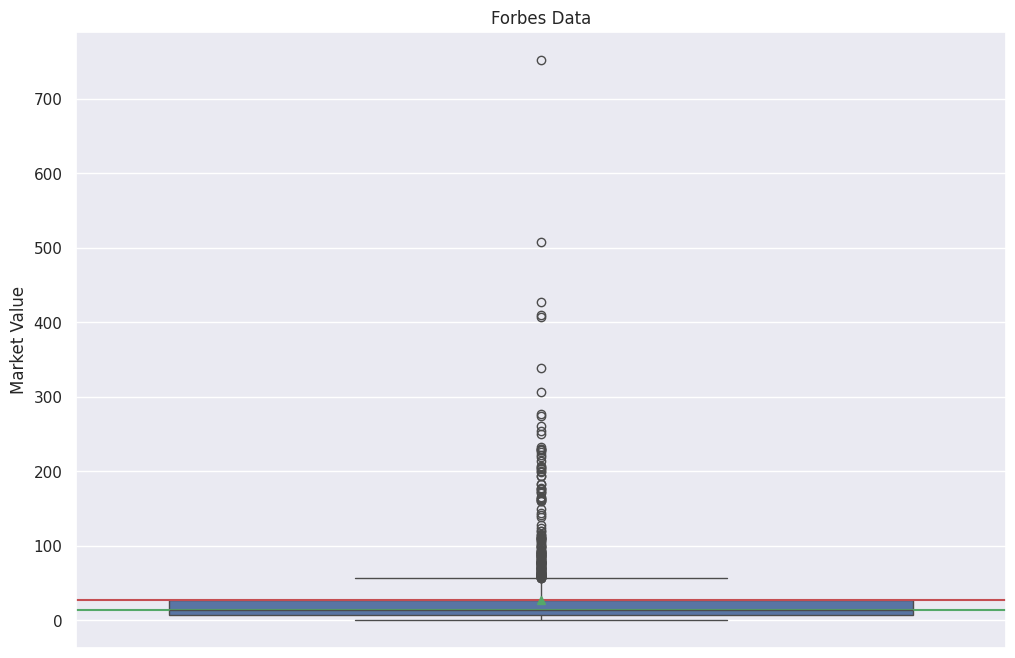

In [17]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_median, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

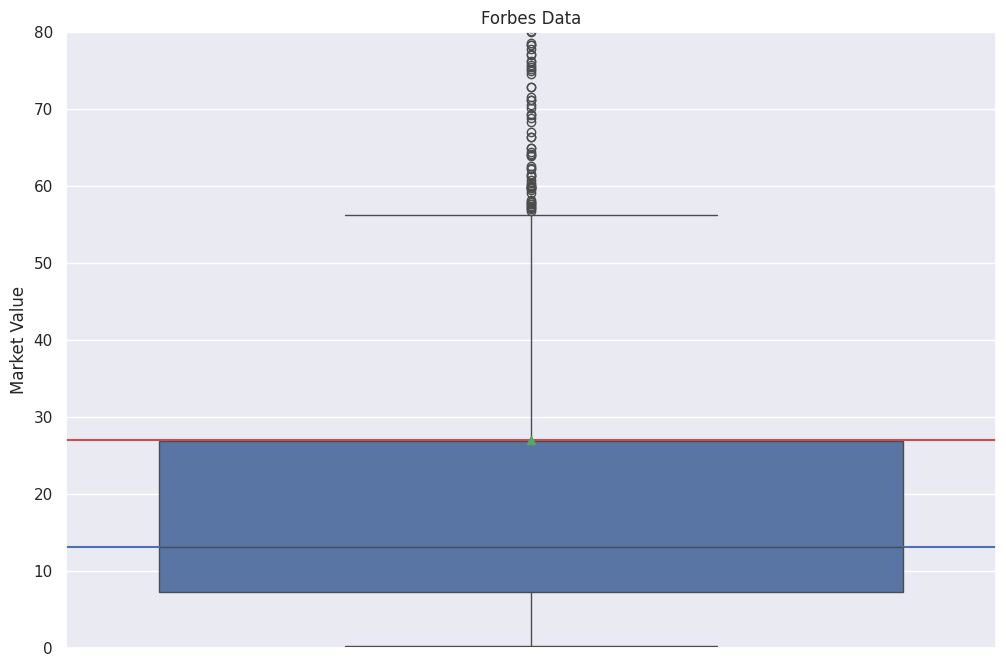

In [18]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

plt.ylim(0, 80)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_median, color='b', linestyle='-')

plt.title('Forbes Data')
plt.show()

##calculate measures of dispersion

In [21]:
prof_max=forbes_data['Profits'].max()
prof_max

45.2

In [23]:
prof_min=forbes_data['Profits'].min()
prof_min

-13.0

In [25]:
prof_range=prof_max-prof_min
prof_range

58.2

####see the outliers in profit range

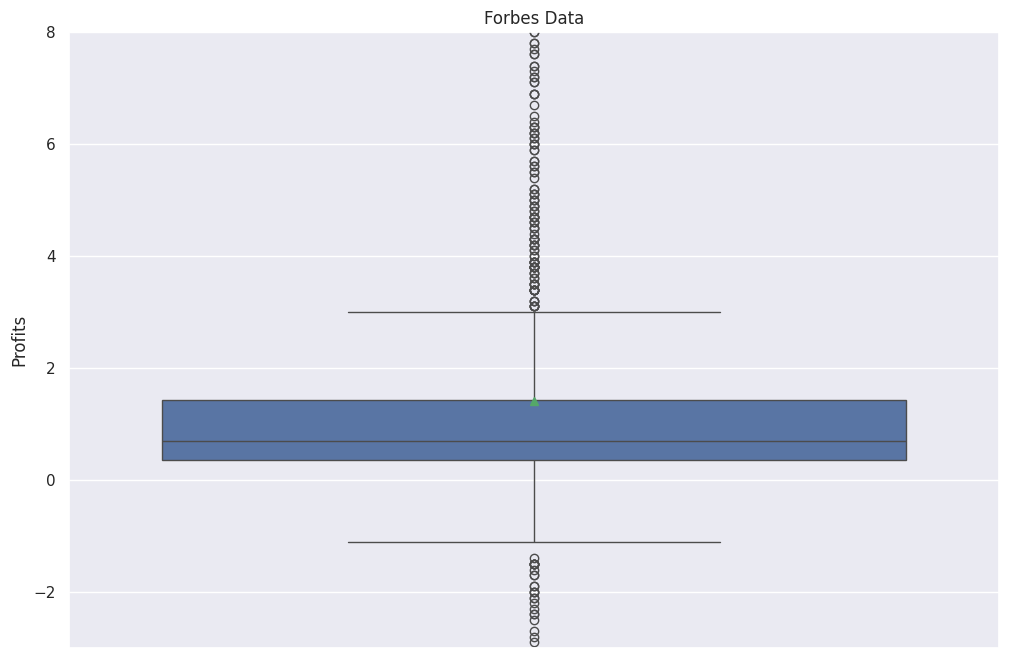

In [27]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Profits', showmeans=True)

plt.title('Forbes Data')
plt.ylim(-3,8)
plt.show()

##IQR

In [28]:
Q1=np.quantile(forbes_data['Profits'],0.25)
Q1

0.34975

In [29]:
Q3=np.quantile(forbes_data['Profits'],0.75)
Q3

1.4249999999999998

In [30]:
IQR=Q3-Q1
IQR

1.0752499999999998

In [33]:
prof_std=forbes_data['Profits'].std()
prof_std

3.244201278603241

In [34]:
prof_var=prof_std**2
prof_var

10.524841936090903

In [35]:
#same as above
prof_var=forbes_data['Profits'].var()
prof_var

10.524841936090903

In [37]:
forbes_data.describe()

,Rank,Sales,Profits,Assets,Market Value
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,909.135279,19.623046,1.407430,97.647016,26.978494
std,554.044456,30.875809,3.244201,287.036157,47.099541
min,1.000000,0.001000,-13.000000,1.300000,0.240000
25%,433.750000,4.900000,0.349750,12.800000,7.300000
50%,883.500000,10.300000,0.692500,25.900000,13.100000
75%,1354.250000,19.900000,1.425000,60.325000,26.900000
max,1999.000000,485.300000,45.200000,3473.200000,752.000000


##Probability and dictribution

In [41]:
def flip(n):

    result=[]
    for i in range(1,n+1):
      result.append(random.choice(["Heads","Tails"]))

    return result


In [44]:
result=flip(10)
result

['Heads',
 'Heads',
 'Tails',
 'Tails',
 'Tails',
 'Heads',
 'Heads',
 'Tails',
 'Tails',
 'Tails']

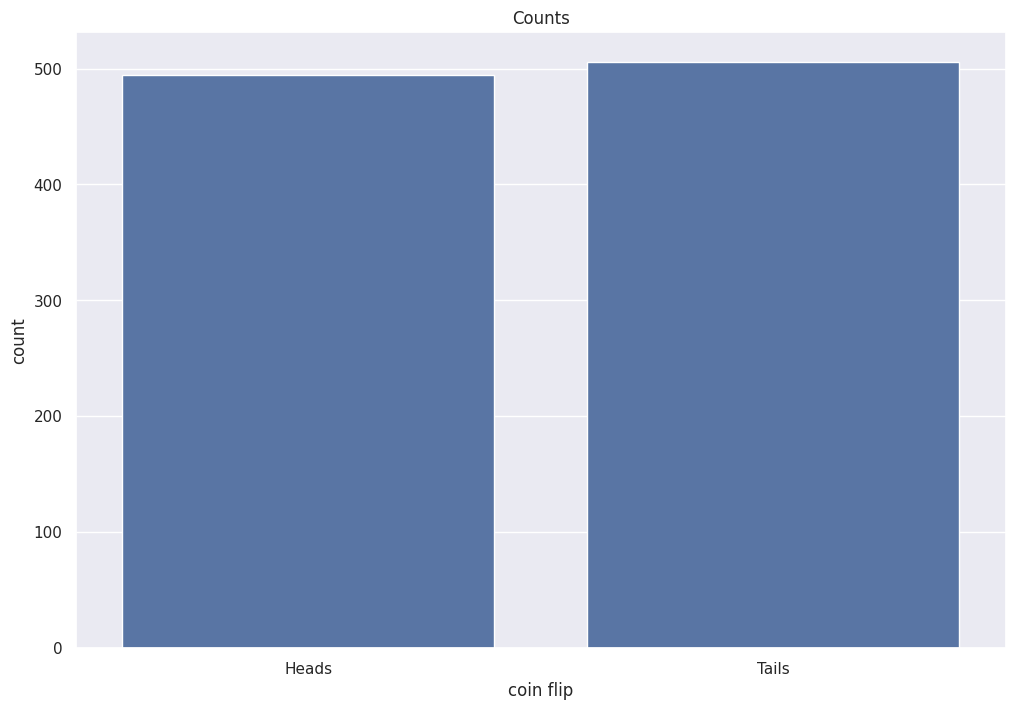

In [49]:
result=flip(1000)
plt.figure(figsize=(12, 8))

sns.countplot(x=result)

plt.title('Counts')
plt.xlabel('coin flip')
plt.show()

##Normal distribution

In [66]:
normal_dist_data=np.random.normal(loc=0,scale=1,size=100000)#this method will generate normally distributed data  mean:0 and std=1
normal_dist_data[:10]

array([-0.59627664, -0.96254741, -1.25151609,  0.80658887,  0.52093539,
       -0.20291087,  0.84240754,  0.39641075,  0.43988229, -2.11927073])

In [67]:
sample_mean=np.mean(normal_dist_data)
sample_mean

-0.000828301439355284

In [68]:
sample_med=np.median(normal_dist_data)
sample_med

-0.0016531505725145435

In [69]:
sample_stdev=np.std(normal_dist_data) ##close to 1
sample_stdev

1.0000745446974542

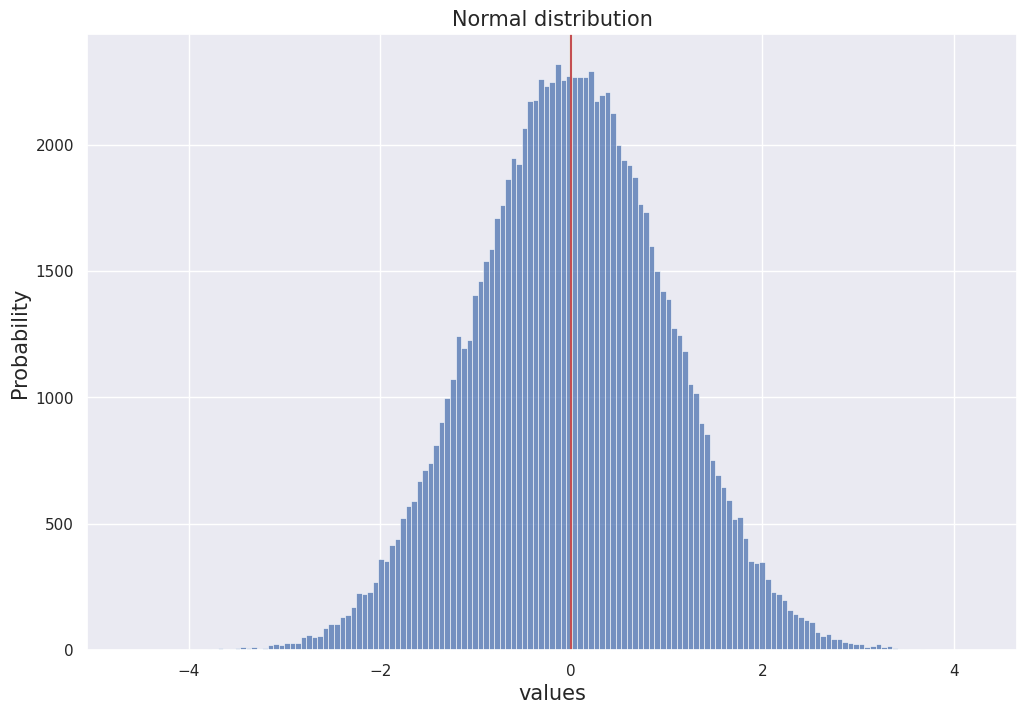

In [70]:
plt.figure(figsize=(12, 8))

sns.histplot(x=normal_dist_data)

plt.title('Normal distribution',fontsize='15')

plt.axvline(x=sample_mean,color='yellow',linestyle='-')
plt.axvline(x=sample_med,color='r',linestyle='-')

plt.xlabel('values',fontsize='15')
plt.ylabel('Probability',fontsize='15')

plt.show()

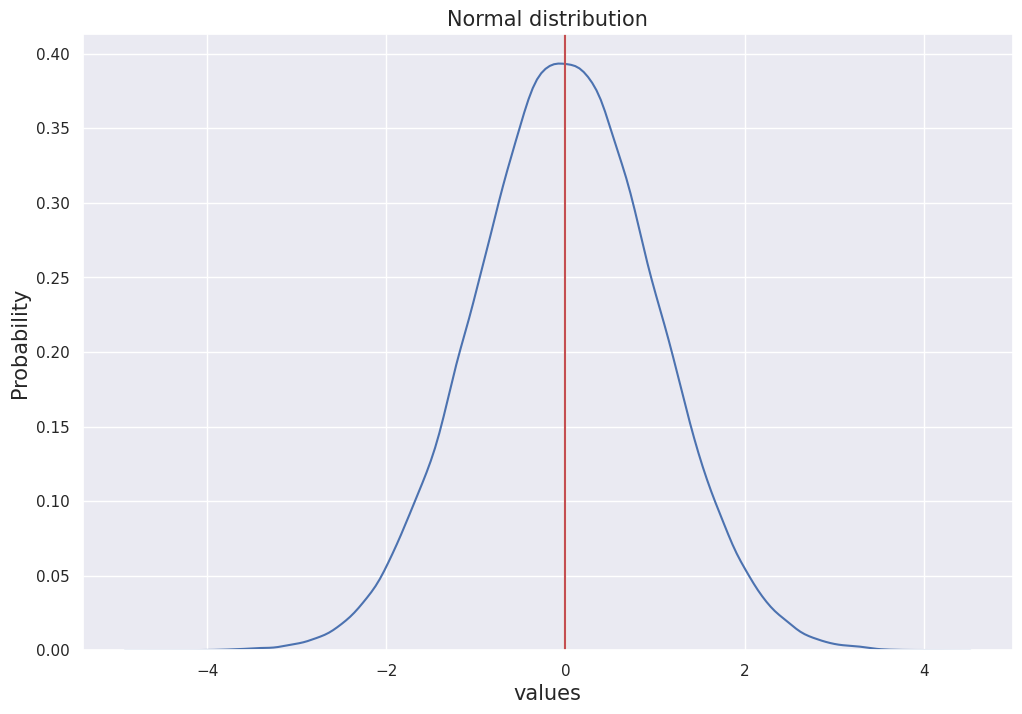

In [71]:
plt.figure(figsize=(12, 8))

sns.kdeplot(x=normal_dist_data)

plt.title('Normal distribution',fontsize='15')

plt.axvline(x=sample_mean,color='yellow',linestyle='-')
plt.axvline(x=sample_med,color='r',linestyle='-')

plt.xlabel('values',fontsize='15')
plt.ylabel('Probability',fontsize='15')

plt.show()

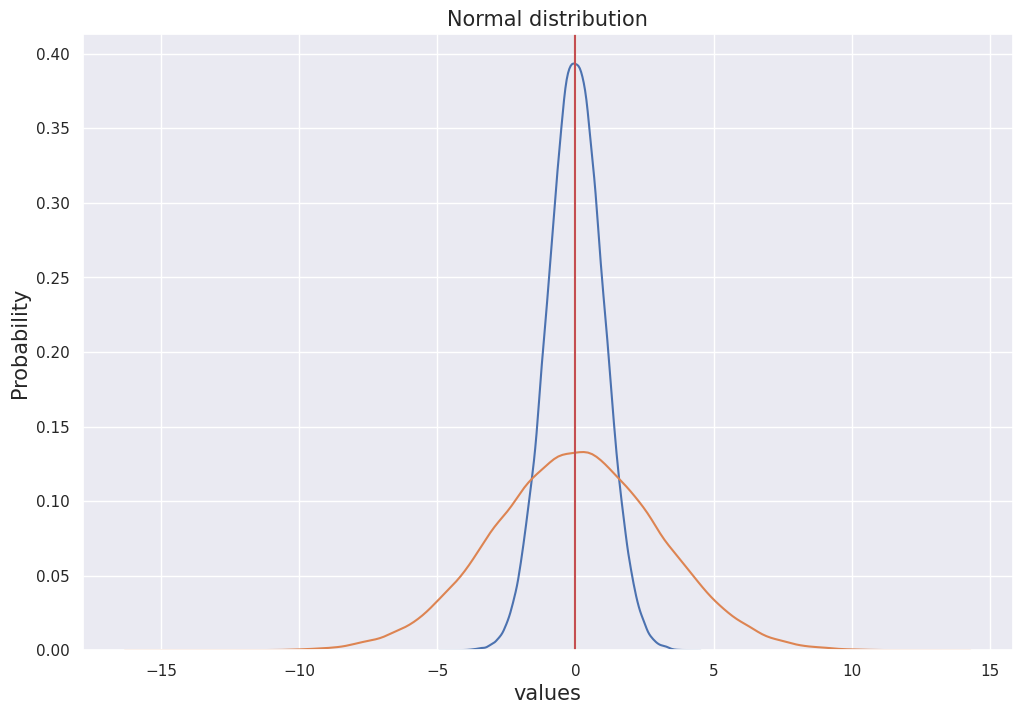

In [72]:
normal_dist_data_scale3=np.random.normal(loc=0,scale=3,size=100000)#this method will generate normally distributed data  mean:0 and std=3
plt.figure(figsize=(12, 8))

sns.kdeplot(x=normal_dist_data)
sns.kdeplot(x=normal_dist_data_scale3)
plt.title('Normal distribution',fontsize='15')

plt.axvline(x=sample_mean,color='yellow',linestyle='-')
plt.axvline(x=sample_med,color='r',linestyle='-')

plt.xlabel('values',fontsize='15')
plt.ylabel('Probability',fontsize='15')

plt.show()

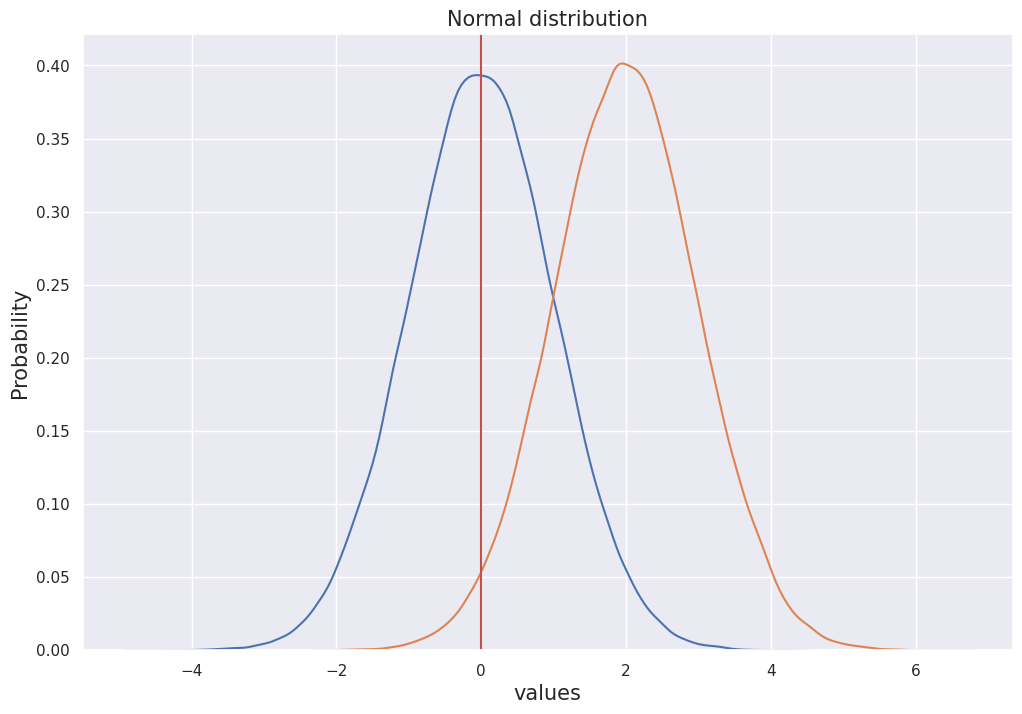

In [73]:
normal_dist_data_loc2=np.random.normal(loc=2,scale=1,size=100000)#this method will generate normally distributed data  mean:2 and std=1
plt.figure(figsize=(12, 8))

sns.kdeplot(x=normal_dist_data)
sns.kdeplot(x=normal_dist_data_loc2)
plt.title('Normal distribution',fontsize='15')

plt.axvline(x=sample_mean,color='yellow',linestyle='-')
plt.axvline(x=sample_med,color='r',linestyle='-')

plt.xlabel('values',fontsize='15')
plt.ylabel('Probability',fontsize='15')

plt.show()

##skewness and kurtosis


In [75]:
sp_data=pd.read_csv("/content/sample_data/SP_500_1987.csv")
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,31-Dec-1986,243.37,244.03,241.28,242.17,242.17,"13,92,00,000"
1,2-Jan-1987,242.17,246.45,242.17,246.45,246.45,"9,18,80,000"
2,5-Jan-1987,246.45,252.57,246.45,252.19,252.19,"18,19,00,000"
3,6-Jan-1987,252.20,253.99,252.14,252.78,252.78,"18,93,00,000"
4,7-Jan-1987,252.78,255.72,252.65,255.33,255.33,"19,09,00,000"


In [81]:
sp_data['Date']=pd.to_datetime(sp_data['Date'],format='mixed')
sp_data.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
AdjClose           float64
Volume              object
dtype: object

Text(0.5, 1.0, 'SP DATA')

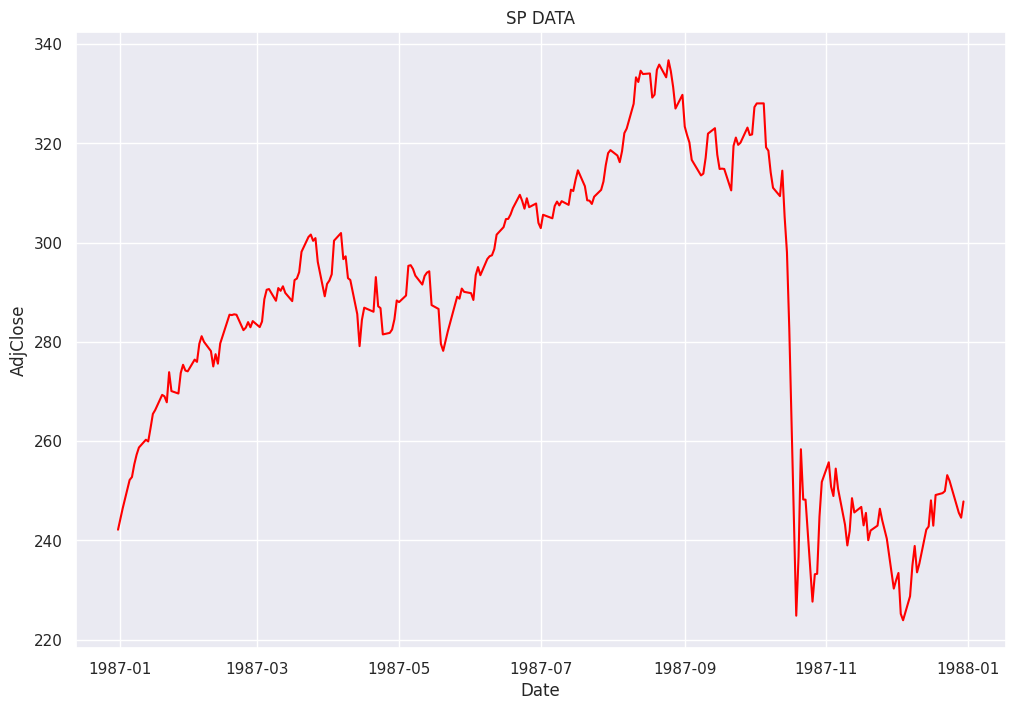

In [83]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=sp_data,x='Date',y='AdjClose',color='red')
plt.title('SP DATA')

In [84]:
sp_data['Returns']=sp_data['AdjClose'].pct_change()
sp_data.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Returns
0,1986-12-31,243.37,244.03,241.28,242.17,242.17,"13,92,00,000",NaN
1,1987-01-02,242.17,246.45,242.17,246.45,246.45,"9,18,80,000",0.017674
2,1987-01-05,246.45,252.57,246.45,252.19,252.19,"18,19,00,000",0.023291
3,1987-01-06,252.20,253.99,252.14,252.78,252.78,"18,93,00,000",0.002340
4,1987-01-07,252.78,255.72,252.65,255.33,255.33,"19,09,00,000",0.010088


In [87]:
sp_data=sp_data.dropna()
sp_data
sp_data.shape

(252, 8)

Text(0.5, 1.0, 'SP DATA')

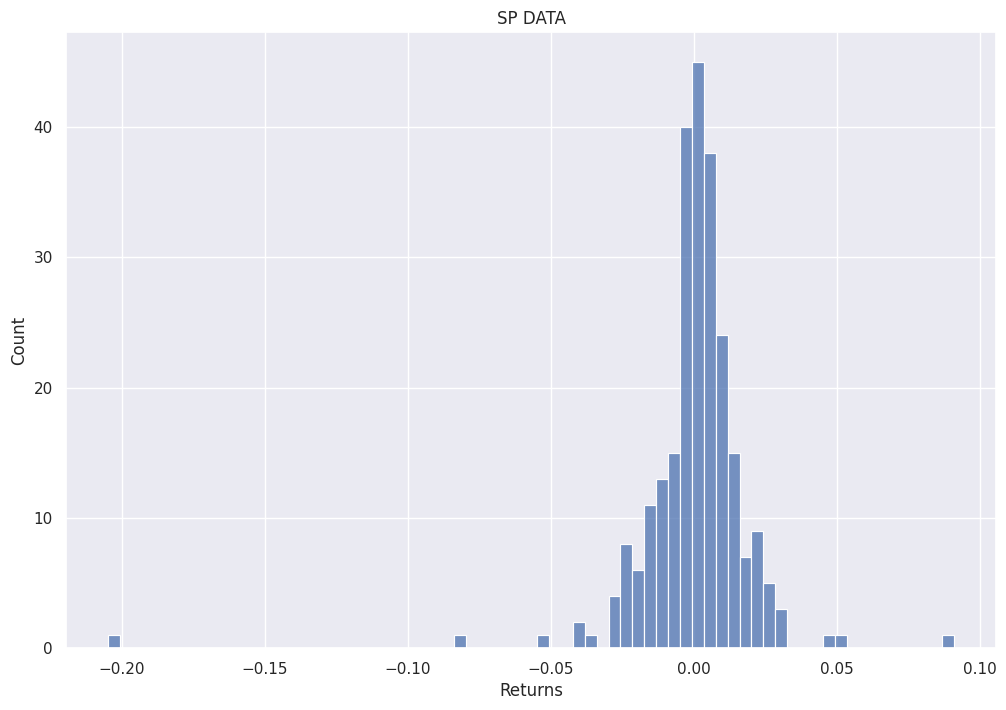

In [88]:
plt.figure(figsize=(12, 8))
sns.histplot(data=sp_data,x='Returns')
plt.title('SP DATA')

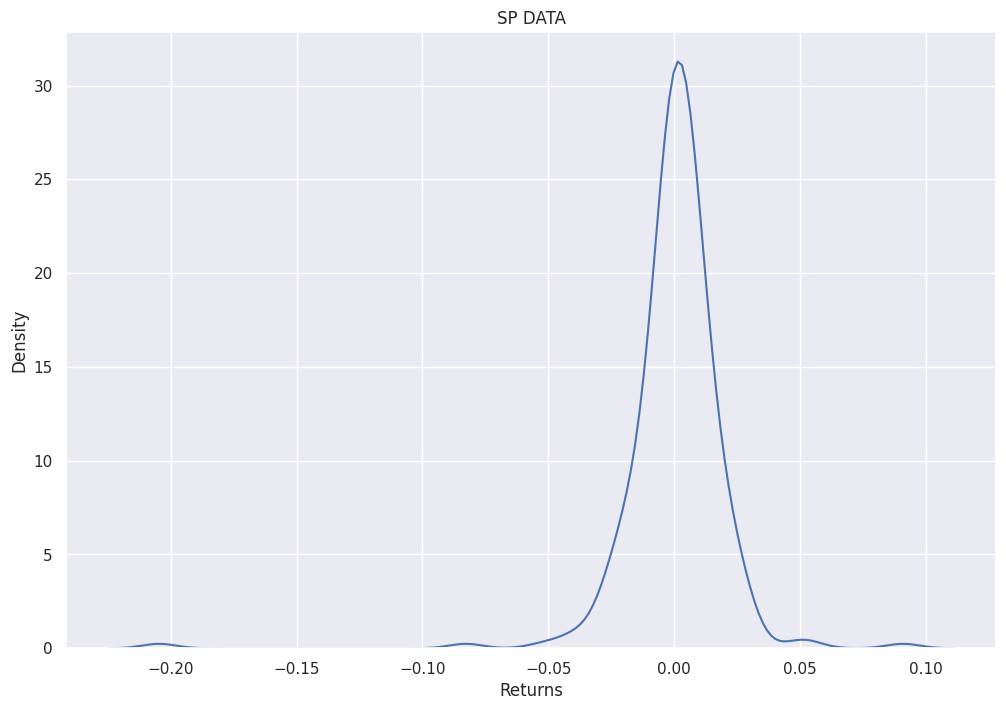

In [89]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=sp_data,x='Returns')
plt.title('SP DATA')
plt.show()#it shows the left skew in data

In [94]:
sp_data['Returns'].skew(axis=0)#skew ness


-4.063006900553241

In [96]:
sm.stats.stattools.robust_skewness(sp_data['Returns'])

(-4.038782236530137,
 0.033689707286255054,
 -0.11690104948849872,
 -0.06460582304845877)

In [95]:
sp_data['Returns'].kurtosis(axis=0)#kurtosis

43.302749862695954

In [97]:
sm.stats.stattools.robust_kurtosis(sp_data['Returns'])

(42.42461267897301, 0.5260629102317422, 1.1767790081095497, 1.350873758059222)

In [98]:
#remove one extreme value and check skewness
sp_data_withoutoct19=sp_data[sp_data['Date']!='1987-10-19']
sp_data_withoutoct19.shape

(251, 8)

In [99]:
sm.stats.stattools.robust_skewness(sp_data_withoutoct19['Returns'])

(0.017513164647138143,
 0.04202122301747493,
 -0.04955418277064157,
 -0.03306593887076004)

In [101]:
sm.stats.stattools.robust_kurtosis(sp_data_withoutoct19['Returns'],excess=True)

(7.587148622145325, 0.5143641446322276, 0.7746063448479199, 1.299285954181316)

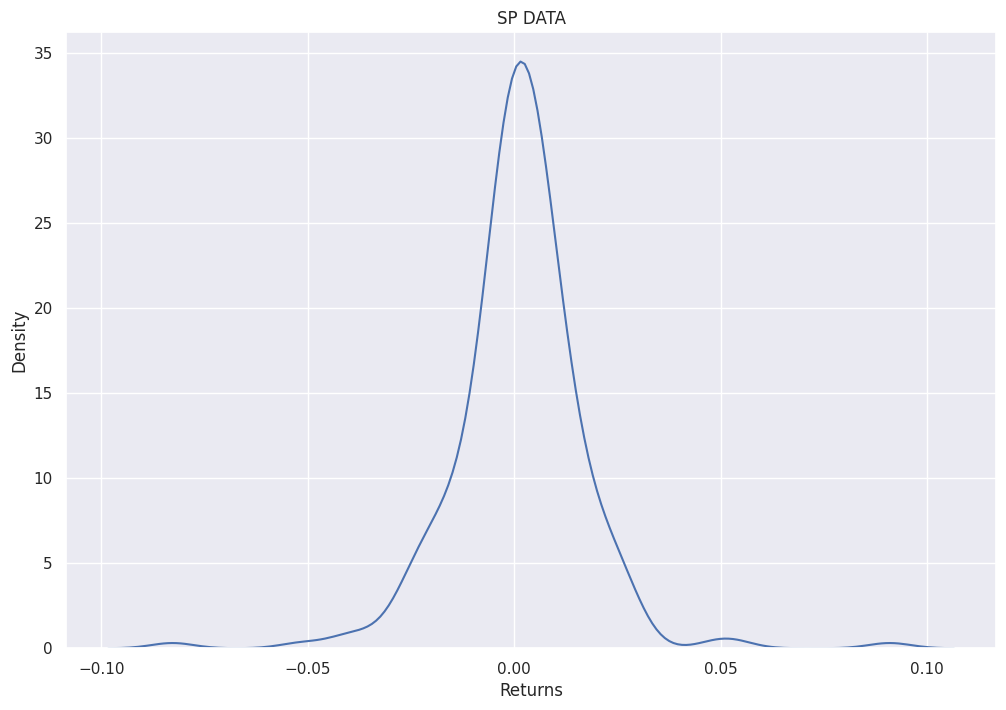

In [102]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=sp_data_withoutoct19,x='Returns')
plt.title('SP DATA')
plt.show()#it shows the left skew in data